In [ ]:
!pip install FinMind
print("FinMind installed")
from FinMind.data import DataLoader
from datetime import datetime, timedelta
import pandas as pd
api = DataLoader()

In [ ]:
'''
To valid plot 中文字
'''
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-01-14 16:37:07--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.31.100, 74.125.31.113, 74.125.31.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.31.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qvn6febdm8uvk05f8qfo207ggppe24g5/1642178175000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-01-14 16:37:11--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qvn6febdm8uvk05f8qfo207ggppe24g5/1642178175000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|172.217.1

In [ ]:
# datetime object containing current date and time
now = datetime.now()
previous_one_week = now - timedelta(days = 7)
previous_two_week = now - timedelta(days = 14)
print("1 week ago", previous_one_week)
print("now =", now)
# YY-mm-dd
dt_string = now.strftime("%Y-%m-%d")
wt_string = previous_one_week.strftime("%Y-%m-%d")
wwt_string = previous_two_week.strftime("%Y-%m-%d")
print("Today =", dt_string)
print("One week ago=", wt_string)
print("two week ago=", wwt_string)

def get_start_date(period):
  now = datetime.now()
  previous_days = now - timedelta(days = period)
  st_date = previous_days.strftime("%Y-%m-%d")
  return st_date

1 week ago 2022-01-07 16:27:03.338006
now = 2022-01-14 16:27:03.338006
Today = 2022-01-14
One week ago= 2022-01-07
two week ago= 2021-12-31


In [ ]:
'''
台灣total stock 資訊
'''
df_total = api.taiwan_stock_info()
df_total

,industry_category,stock_id,stock_name,type,date
0,ETF,0050,元大台灣50,twse,2022-01-13
1,ETF,0051,元大中型100,twse,2022-01-13
2,ETF,0052,富邦科技,twse,2022-01-13
3,ETF,0053,元大電子,twse,2022-01-13
4,ETF,0054,元大台商50,twse,2022-01-13
...,...,...,...,...,...
2869,大盤,TAIEX,加權指數,twse,None
2870,Index,Textiles,紡織纖維類指數,twse,None
2871,Index,Tourism,觀光事業類指數,twse,None
2872,大盤,TPEx,櫃買指數,tpex,None


In [ ]:
'''
元大台灣, 國泰永續高股息, 佳世達
'''
have_stock = ['0050', '00878', '2352']
'''
頎邦, 南茂, 欣銓, 聯電, 華通, 金像電, 廣達, 元大金, 友達, 群創, 彩晶
'''
focus_name1 = ["頎邦", "南茂", "欣銓", "聯電", "華通", "金像電", "廣達", "元大金", "友達", "群創", "彩晶"]
focus_stock1 = ['6147', '8150', '3264', '2303', '2313', '2368', '2382', '2885', '2409', '6116']

In [ ]:
'''
技術面：
現金殖利率：dividend yield
股價淨值比（Price-Book Ratio, PBR）
本益比(Price-to-Earning Ratio, PER) 每股市價除以每股盈餘
回傳三個dataFrame: DY, PBR, PER
'''
def DY_PER_PBR(focus_list, period):
  df_dy = pd.DataFrame(columns=['empty'])
  df_pbr = pd.DataFrame(columns=['empty'])
  df_per = pd.DataFrame(columns=['empty'])
  for item in focus_list:
    tmp_df = api.taiwan_stock_per_pbr(
    stock_id= item,
    start_date= get_start_date(period)
    )
    one_dy = tmp_df.pivot(index="stock_id", columns="date", values= "dividend_yield")
    one_pbr = tmp_df.pivot(index="stock_id", columns="date", values= "PBR")
    one_per = tmp_df.pivot(index="stock_id", columns="date", values= "PER")
    if df_dy.empty:
      df_dy = one_dy
      df_pbr = one_pbr
      df_per = one_per
    else: 
      df_dy = pd.concat([df_dy, one_dy])
      df_pbr = pd.concat([df_pbr, one_pbr])
      df_per = pd.concat([df_per, one_per])
  
  return df_dy, df_per, df_pbr




In [ ]:
have_dy, have_per, have_pbr  =  DY_PER_PBR(focus_stock1, 7)

In [ ]:
have_per.T.index

Index(['2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
       '2022-01-14'],
      dtype='object', name='date')

15.195000000000002


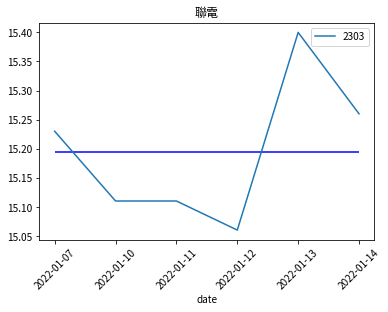

In [ ]:
print(have_per.T['2303'].mean())
have_per.T.plot(y ='2303', rot=45, title = '聯電')
plt.hlines(y=have_per.T['2303'].mean(), xmin=0, xmax=len(have_per.T)-1, color='b')

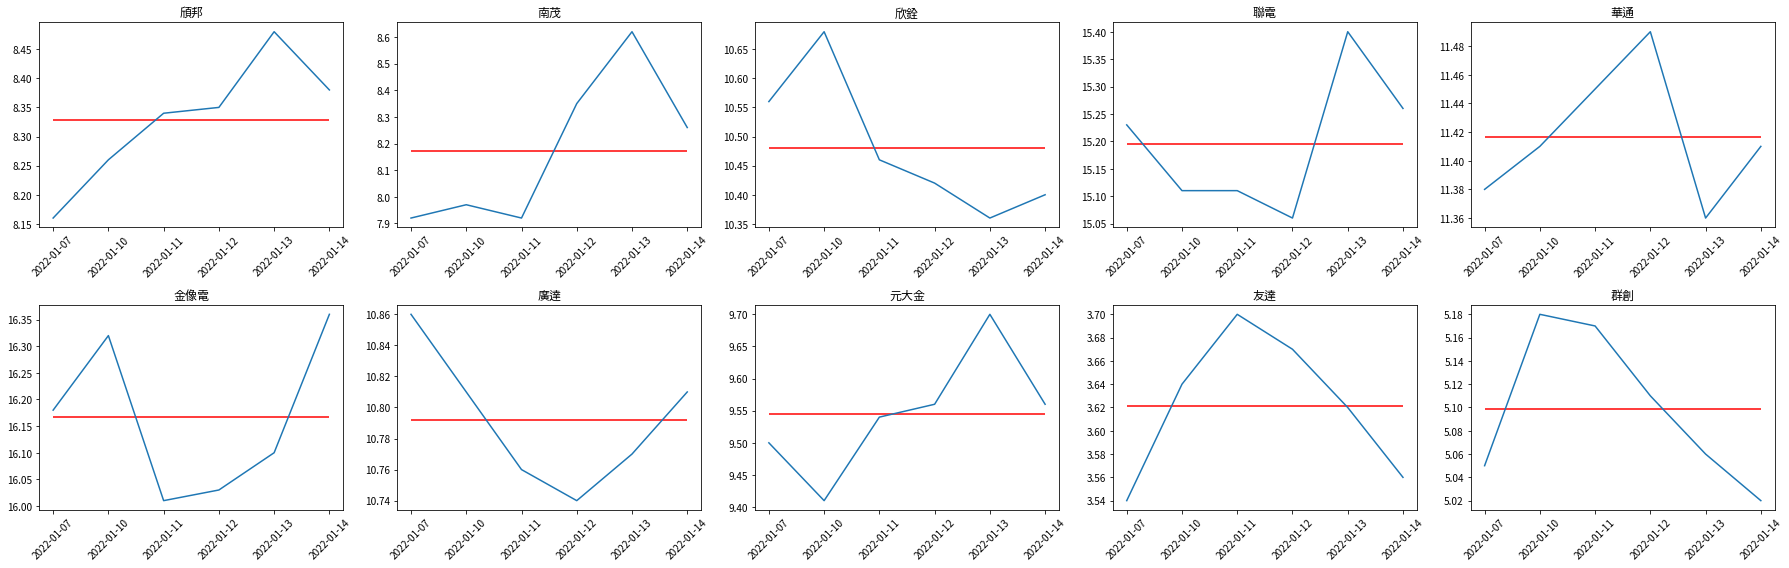

In [ ]:
import matplotlib.pyplot as plt
nrow, ncol = 2, 5
fig, axes = plt.subplots(nrow, ncol,figsize=(25, 8))
# plot counter
tmplist = []
count=0
for r in range(nrow):
    for c in range(ncol):
        tmplist = have_per.T[focus_stock1[count]].values.tolist()
        # have_per.T.plot(ax=axes[r,c], y =focus_stock1[count], rot=45, title = focus_name1[count])
        ax = axes[r,c]
        ax.plot(have_per.T.index, have_per.T[focus_stock1[count]])
        ax.set_xticklabels(have_per.T.index, rotation=45)
        ax.set_title(focus_name1[count])
        ax.hlines(y=have_per.T[focus_stock1[count]].mean(), xmin=0, xmax=len(have_per.T)-1, color='r')
        count+=1
        # plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
tmp_concat

date,2022-01-06,2022-01-07,2022-01-10,2022-01-11,2022-01-12,2022-01-13
stock_id,,,,,,
6147,8.22,8.16,8.26,8.34,8.35,8.48
2352,6.69,6.62,6.72,6.71,6.67,6.65
